In [142]:
#Imports
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import warnings

import seaborn as sns


In [143]:
#To remove warnings 
warnings.filterwarnings("ignore", category=FutureWarning)

In [144]:
#seaborn configuration
sns.set_style('white')
sns.set_palette ("Set1")


In [175]:
file = "data/combined_dataframe.csv"
df = pd.read_csv(file, sep = '\t')  

## Rainy races
Races with rain, i.e. those in which intermediate or wet tires are used, are eliminated. 

### Plot

<Axes: xlabel='Year', ylabel='Value'>

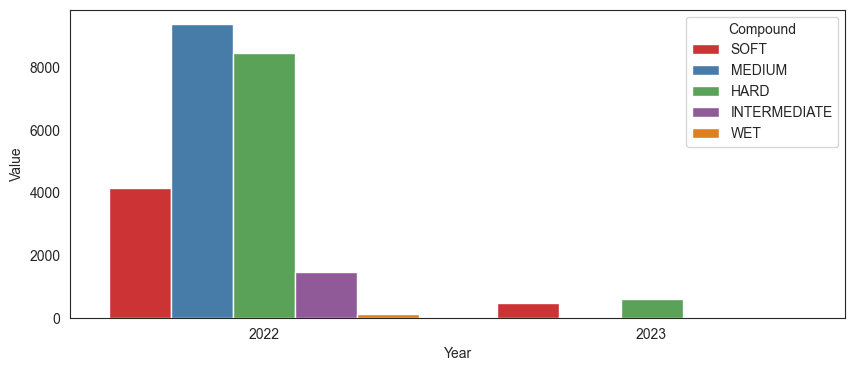

In [146]:
value_counts = df.groupby('Year')['Compound'].value_counts()
all_values = pd.MultiIndex.from_product([df['Year'].unique(), df['Compound'].unique()])
value_counts = value_counts.reindex(all_values, fill_value=0)

value_counts = value_counts.reset_index()
value_counts.columns = ['Year', 'Compound', "Value"]

sns.barplot(x='Year', y='Value', hue='Compound', data=value_counts)


### Deleted 

In [147]:
initial_races = 0
rain_races= 0
for year in df['Year'].unique():
    for raceNumber in df[df['Year'] == year]['RaceNumber'].unique():
        initial_races+=1
        val = df.loc[(df['Year'] == year) & (df['RaceNumber'] == raceNumber)]
        #If in that race any driver uses Intermediate or wet tyres, delete the all the sace
        if ('INTERMEDIATE' in val['Compound'].values or 'WET' in val['Compound'].values):
            rain_races +=1
            df = df.drop(val.index)

print("Total races in the DataSet: " + str(initial_races))
print("Number of races that have been eliminated due to rain: " + str(rain_races))

Total races in the DataSet: 23
Number of races that have been eliminated due to rain: 4


## Retired or more than 3 stops 
Drivers who have not finished, or have finished lapped 1 lap are eliminated \\
Those who have more than 3 stops are also eliminated, this is due to some reason during the race, even if they have not retired.  \\
It may happen that these coincide with those of +2 laps or more, but in the chart they are counted separately. 


In [176]:
list_remove = pd.DataFrame()
for year in df['Year'].unique():
    for raceNumber in df[df['Year'] == year]['RaceNumber'].unique():
        for driver in df[(df['Year'] == year) & (df['RaceNumber'] == raceNumber)]["Driver"].unique():
            val = df.loc[(df['Year'] == year) & (df['RaceNumber'] == raceNumber) & (df['Driver'] == driver)]
            if ('Finished' != val["ResultStatus"].iloc[0] and '+1 Lap' != val["ResultStatus"].iloc[0]):
                #print(val["ResultStatus"].iloc[0])
                list_remove = list_remove.append({'year': year, 'driver': driver, 'problem': val["ResultStatus"].iloc[0]}, ignore_index=True)
                df = df.drop(val.index)
            elif val["NumberPitStops_x"].iloc[-1] >4: #! TODO change de name 
                list_remove = list_remove.append({'year': year, 'driver': driver, 'problem': "+4 pit stops"}, ignore_index=True)
                df = df.drop(val.index)


### Plot

Collision damage    11
Engine               8
Accident             7
+2 Laps              7
Power Unit           5
Gearbox              4
Collision            4
Hydraulics           3
Water leak           2
Water pressure       2
Mechanical           2
Fuel pressure        2
Undertray            2
Spun off             2
+3 pit stops         1
Fuel pump            1
Differential         1
Oil leak             1
+6 Laps              1
Power loss           1
Vibrations           1
Turbo                1
Suspension           1
Front wing           1
Fuel leak            1
Water pump           1
Cooling system       1
Electrical           1
Name: problem, dtype: int64


[Text(0, 0, 'Collision damage'),
 Text(1, 0, 'Engine'),
 Text(2, 0, 'Accident'),
 Text(3, 0, '+2 Laps'),
 Text(4, 0, 'Power Unit'),
 Text(5, 0, 'Gearbox'),
 Text(6, 0, 'Collision'),
 Text(7, 0, 'Hydraulics'),
 Text(8, 0, 'Water leak'),
 Text(9, 0, 'Water pressure'),
 Text(10, 0, 'Mechanical'),
 Text(11, 0, 'Fuel pressure'),
 Text(12, 0, 'Undertray'),
 Text(13, 0, 'Spun off'),
 Text(14, 0, '+3 pit stops'),
 Text(15, 0, 'Fuel pump'),
 Text(16, 0, 'Differential'),
 Text(17, 0, 'Oil leak'),
 Text(18, 0, '+6 Laps'),
 Text(19, 0, 'Power loss'),
 Text(20, 0, 'Vibrations'),
 Text(21, 0, 'Turbo'),
 Text(22, 0, 'Suspension'),
 Text(23, 0, 'Front wing'),
 Text(24, 0, 'Fuel leak'),
 Text(25, 0, 'Water pump'),
 Text(26, 0, 'Cooling system'),
 Text(27, 0, 'Electrical')]

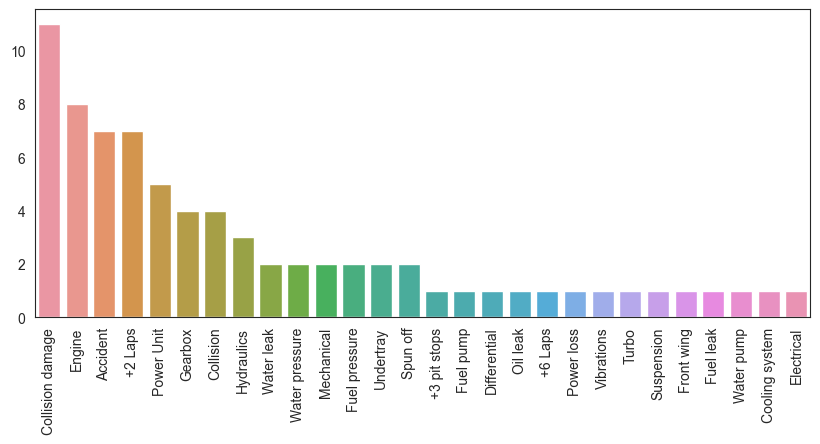

In [177]:
value_counts = list_remove["problem"].value_counts()

ax = sns.barplot(x=value_counts.index, y=value_counts.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)